# Stock Prediction Using Neural Networks - Utkarsh Gaikwad

# Read Stock data

In [37]:
from warnings import filterwarnings
filterwarnings('ignore')

In [38]:
import yfinance as yf
ticker = 'AXISBANK.NS'
data= yf.download(ticker,period='1y',interval='1d')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-11 00:00:00+05:30,782.000000,793.000000,779.000000,787.150024,785.953674,4417455
2021-10-12 00:00:00+05:30,788.000000,799.700012,785.450012,797.150024,795.938477,5098502
2021-10-13 00:00:00+05:30,799.950012,804.500000,793.200012,794.599976,793.392273,4381414
2021-10-14 00:00:00+05:30,799.000000,804.000000,788.000000,802.049988,800.830994,7157116
2021-10-18 00:00:00+05:30,820.000000,820.000000,802.049988,813.299988,812.063904,11014585


In [39]:
df = data.drop(labels=['Adj Close'],axis=1)

In [40]:
lags = 6 
for i in df.columns:
    for j in range(lags):
        df[i+'_Lag'+str(j)]=df[i].shift(j)

In [41]:
df = df.dropna(axis=0)
df.head()

,Open,High,Low,Close,Volume,Open_Lag0,Open_Lag1,Open_Lag2,Open_Lag3,Open_Lag4,...,Close_Lag2,Close_Lag3,Close_Lag4,Close_Lag5,Volume_Lag0,Volume_Lag1,Volume_Lag2,Volume_Lag3,Volume_Lag4,Volume_Lag5
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-19 00:00:00+05:30,820.000000,827.000000,798.500000,801.650024,10633732,820.000000,820.000000,799.000000,799.950012,788.000000,...,802.049988,794.599976,797.150024,787.150024,10633732,11014585.0,7157116.0,4381414.0,5098502.0,4417455.0
2021-10-20 00:00:00+05:30,800.599976,813.799988,792.000000,804.799988,9023067,800.599976,820.000000,820.000000,799.000000,799.950012,...,813.299988,802.049988,794.599976,797.150024,9023067,10633732.0,11014585.0,7157116.0,4381414.0,5098502.0
2021-10-21 00:00:00+05:30,807.950012,813.500000,792.299988,807.799988,7405639,807.950012,800.599976,820.000000,820.000000,799.000000,...,801.650024,813.299988,802.049988,794.599976,7405639,9023067.0,10633732.0,11014585.0,7157116.0,4381414.0
2021-10-22 00:00:00+05:30,812.000000,825.000000,806.799988,816.700012,10646970,812.000000,807.950012,800.599976,820.000000,820.000000,...,804.799988,801.650024,813.299988,802.049988,10646970,7405639.0,9023067.0,10633732.0,11014585.0,7157116.0
2021-10-25 00:00:00+05:30,830.099976,866.900024,825.450012,845.099976,29193770,830.099976,812.000000,807.950012,800.599976,820.000000,...,807.799988,804.799988,801.650024,813.299988,29193770,10646970.0,7405639.0,9023067.0,10633732.0,11014585.0


# Define X and Y

In [42]:
X = df.drop(labels=['Open','High','Low','Close','Volume'],axis=1)
Y = df[['Close']]

# Scaling X with MinMaxScaler

In [43]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
mm = MinMaxScaler()
Xnew = pd.DataFrame(mm.fit_transform(X),columns=X.columns)
Xnew.head()

,Open_Lag0,Open_Lag1,Open_Lag2,Open_Lag3,Open_Lag4,Open_Lag5,High_Lag0,High_Lag1,High_Lag2,High_Lag3,...,Close_Lag2,Close_Lag3,Close_Lag4,Close_Lag5,Volume_Lag0,Volume_Lag1,Volume_Lag2,Volume_Lag3,Volume_Lag4,Volume_Lag5
0,0.873440,0.873440,0.779857,0.784091,0.730838,0.704100,0.828939,0.798928,0.730332,0.732476,...,0.803917,0.769984,0.781599,0.736051,0.253531,0.263344,0.163958,0.092443,0.110918,0.093371
1,0.786987,0.873440,0.873440,0.779857,0.784091,0.730838,0.772347,0.828939,0.798928,0.730332,...,0.855158,0.803917,0.769984,0.781599,0.212033,0.253531,0.263344,0.163958,0.092443,0.110918
2,0.819741,0.786987,0.873440,0.873440,0.779857,0.784091,0.771061,0.772347,0.828939,0.798928,...,0.802095,0.855158,0.803917,0.769984,0.170361,0.212033,0.253531,0.263344,0.163958,0.092443
3,0.837790,0.819741,0.786987,0.873440,0.873440,0.779857,0.820364,0.771061,0.772347,0.828939,...,0.816443,0.802095,0.855158,0.803917,0.253872,0.170361,0.212033,0.253531,0.263344,0.163958
4,0.918449,0.837790,0.819741,0.786987,0.873440,0.873440,1.000000,0.820364,0.771061,0.772347,...,0.830107,0.816443,0.802095,0.855158,0.731723,0.253872,0.170361,0.212033,0.253531,0.263344


# Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Creating Neural Network

In [45]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience=30)
nn = Sequential()
nn.add(Dense(200,input_dim=(len(Xnew.columns))))
nn.add(Dense(200,activation="relu"))
nn.add(Dropout(0.3))
nn.add(Dense(200,activation="relu"))
nn.add(Dropout(0.3))
nn.add(Dense(1,activation="relu"))

In [46]:
nn.compile(loss='mse')
model = nn.fit(xtrain, ytrain, validation_data=(xtest,ytest),epochs=500,callbacks=es)

Epoch 1/500
7/7 [==============================] - 1s 48ms/step - loss: 519760.8125 - val_loss: 480008.2500
Epoch 2/500
7/7 [==============================] - 0s 10ms/step - loss: 444744.8125 - val_loss: 349198.0000
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 278790.1562 - val_loss: 179039.1875
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 124568.9219 - val_loss: 82303.0156
Epoch 5/500
7/7 [==============================] - 0s 10ms/step - loss: 64119.9141 - val_loss: 66513.8281
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 59508.0039 - val_loss: 73817.1406
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 57819.9805 - val_loss: 61037.4141
Epoch 8/500
7/7 [==============================] - 0s 8ms/step - loss: 55250.6211 - val_loss: 60539.2695
Epoch 9/500
7/7 [==============================] - 0s 9ms/step - loss: 52385.1289 - val_loss: 57309.4297
Epoch 10/500
7/7 [===========================

In [47]:
tr = model.history['loss']
ts = model.history['val_loss']

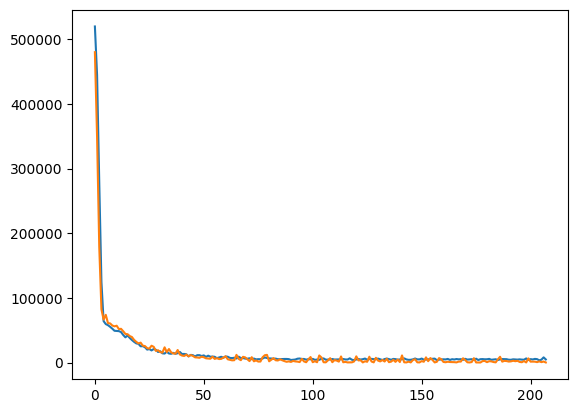

In [48]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)
plt.show()

In [49]:
ts_pred = nn.predict(xtest)
tr_pred = nn.predict(xtrain)
from sklearn.metrics import mean_squared_error,r2_score
ts_err = mean_squared_error(ts_pred,ytest)
tr_err = mean_squared_error(tr_pred,ytrain)
tr_r2 = r2_score(tr_pred,ytrain)
ts_r2 = r2_score(ts_pred,ytest)
print('Training Root Mean Squared Error is : ',round(tr_err**0.5,2))
print('Testing Root Mean Squared Error is  : ',round(ts_err**0.5,2))
print('Training R2 Score is                : ',round(tr_r2,4))
print('Testing R2 Score is                 : ',round(ts_r2,4))

7/7 [==============================] - 0s 1ms/step
Training Root Mean Squared Error is :  7.71
Testing Root Mean Squared Error is  :  12.29
Training R2 Score is                :  0.9794
Testing R2 Score is                 :  0.9593


8/8 [==============================] - 0s 2ms/step


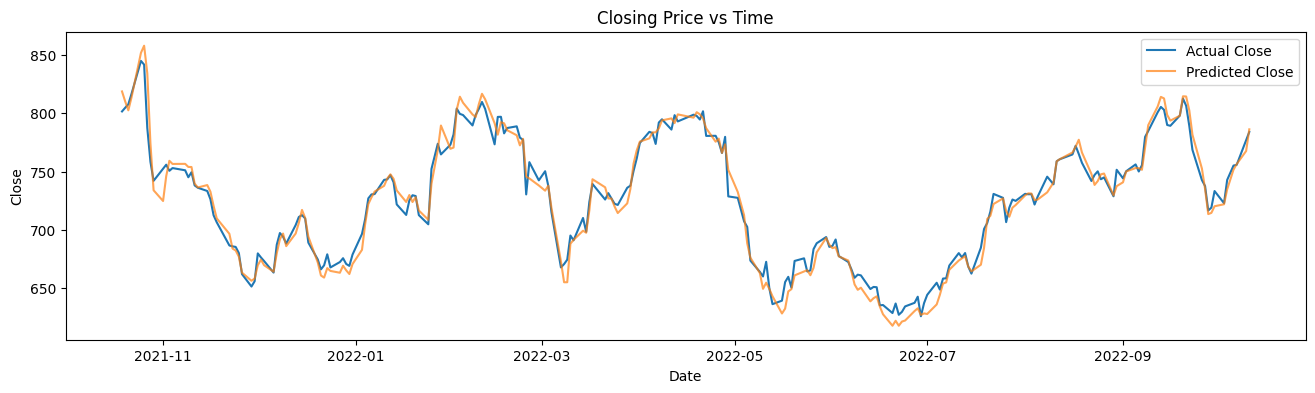

In [52]:
pred = nn.predict(Xnew)
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(df['Close'],label='Actual Close')
plt.plot(df.index,pred,label='Predicted Close',alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Closing Price vs Time')
plt.legend()
plt.show()
